# RNN
- 삼성 주식 시계열 분석

## Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns
import tensorflow as tf
import keras
%load_ext autotime

time: 57 µs (started: 2024-07-02 11:24:27 +09:00)


## 데이터 불러오기

In [1]:
samsung = pd.read_csv('005930.KS.csv')
samsung.shape

(6140, 7)

time: 6.75 ms (started: 2024-07-02 11:24:27 +09:00)


In [2]:
df = samsung.copy()
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710449,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.729980,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.860352,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000


time: 5.22 ms (started: 2024-07-02 11:24:27 +09:00)


In [3]:
df.columns = [col.replace(' ','_').lower() for col in df.columns]
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710449,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.729980,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.860352,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000


time: 3.04 ms (started: 2024-07-02 11:24:27 +09:00)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6140 non-null   object 
 1   open       6140 non-null   float64
 2   high       6140 non-null   float64
 3   low        6140 non-null   float64
 4   close      6140 non-null   float64
 5   adj_close  6140 non-null   float64
 6   volume     6140 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.9+ KB
time: 2.47 ms (started: 2024-07-02 11:24:27 +09:00)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,6140.0,2.848076e+04,2.269316e+04,2540.000000,1.072000e+04,2.125000e+04,4.575000e+04,90300.0
high,6140.0,2.875581e+04,2.286959e+04,2760.000000,1.090000e+04,2.149000e+04,4.618500e+04,96800.0
low,6140.0,2.819435e+04,2.249832e+04,2420.000000,1.057500e+04,2.100000e+04,4.525000e+04,89500.0
close,6140.0,2.847094e+04,2.267180e+04,2730.000000,1.074000e+04,2.126000e+04,4.570000e+04,91000.0
adj_close,6140.0,2.462316e+04,2.216932e+04,1988.169312,7.915908e+03,1.644601e+04,3.910022e+04,85300.0
volume,6140.0,2.116507e+07,1.504666e+07,0.000000,1.169729e+07,1.715452e+07,2.617382e+07,164215000.0


time: 9.55 ms (started: 2024-07-02 11:24:27 +09:00)


In [6]:
df[df['volume'] == 0]

,date,open,high,low,close,adj_close,volume
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3736.008789,0
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3728.725830,0
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,4952.213867,0
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5032.323730,0
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4369.603027,0
...,...,...,...,...,...,...,...
5564,2022-02-28,71900.0,71900.0,71900.0,71900.0,68423.656250,0
5567,2022-03-04,72900.0,72900.0,72900.0,72900.0,69375.296875,0
5570,2022-03-10,69500.0,69500.0,69500.0,69500.0,66139.695313,0
5573,2022-03-15,70200.0,70200.0,70200.0,70200.0,66805.843750,0


time: 4.44 ms (started: 2024-07-02 11:24:27 +09:00)


## 데이터 전처리

In [7]:
df.loc[df['volume']==0,'volume'] = np.nan
df.isna().sum()

date           0
open           0
high           0
low            0
close          0
adj_close      0
volume       127
dtype: int64

time: 1.82 ms (started: 2024-07-02 11:24:27 +09:00)


In [8]:
df = df.dropna()
df.head(5)

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710449,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.729980,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.860352,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000.0


time: 3.64 ms (started: 2024-07-02 11:24:27 +09:00)


In [9]:
df['date'] = pd.to_datetime(df['date'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6013 non-null   datetime64[ns]
 1   open       6013 non-null   float64       
 2   high       6013 non-null   float64       
 3   low        6013 non-null   float64       
 4   close      6013 non-null   float64       
 5   adj_close  6013 non-null   float64       
 6   volume     6013 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 375.8 KB
time: 4.19 ms (started: 2024-07-02 11:24:27 +09:00)


In [10]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710449,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.729980,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.860352,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000.0


time: 3.43 ms (started: 2024-07-02 11:24:27 +09:00)


In [11]:
df = df.set_index('date')
df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710449,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.729980,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.860352,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000.0


time: 4.47 ms (started: 2024-07-02 11:24:27 +09:00)


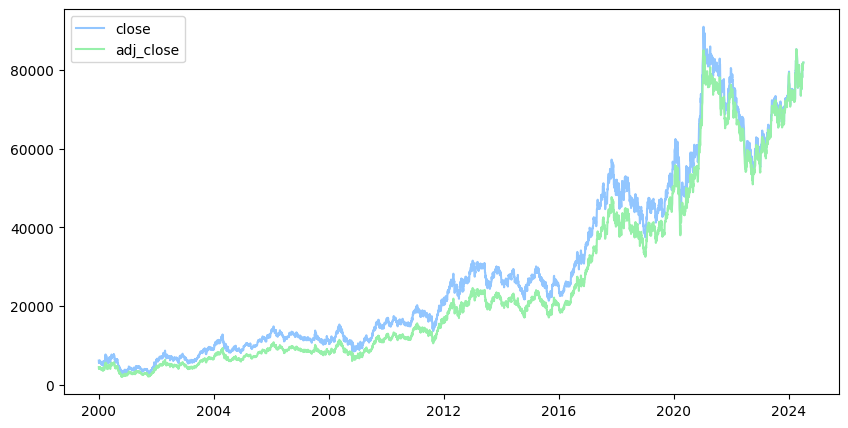

time: 105 ms (started: 2024-07-02 11:24:27 +09:00)


In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['close'], label='close')
plt.plot(df.index, df['adj_close'], label='adj_close')
plt.legend()
plt.show()

In [13]:
df['ma3'] = np.around(df['close'].rolling(window=3).mean(),0)
df['ma5'] = np.around(df['close'].rolling(window=5).mean(),0)
df['mid'] = (df['low'] + df['high']) / 2
df.head(5)

,open,high,low,close,adj_close,volume,ma3,ma5,mid
date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710449,74195000.0,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.729980,74680000.0,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.860352,54390000.0,5770.0,NaN,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0,5580.0,NaN,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000.0,5643.0,5724.0,5675.0


time: 10.4 ms (started: 2024-07-02 11:24:27 +09:00)


In [14]:
df = df.dropna()
df.head(5)

,open,high,low,close,adj_close,volume,ma3,ma5,mid
date,,,,,,,,,
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.100098,46880000.0,5643.0,5724.0,5675.0
2000-01-11,5820.0,6100.0,5770.0,5770.0,4202.100098,59745000.0,5693.0,5656.0,5935.0
2000-01-12,5610.0,5740.0,5600.0,5720.0,4165.684082,29220000.0,5753.0,5684.0,5670.0
2000-01-13,5600.0,5740.0,5560.0,5710.0,4158.402832,41190000.0,5733.0,5702.0,5650.0
2000-01-14,5720.0,5880.0,5680.0,5830.0,4245.795898,49375000.0,5753.0,5760.0,5780.0


time: 8 ms (started: 2024-07-02 11:24:27 +09:00)


### 학습, 테스트 데이터 분리

In [15]:
df.shape

(6009, 9)

time: 1.04 ms (started: 2024-07-02 11:24:27 +09:00)


In [16]:
split_idx = int(df.shape[0]*0.8)

time: 239 µs (started: 2024-07-02 11:24:27 +09:00)


In [17]:
train = df.iloc[:split_idx,]
train.shape

(4807, 9)

time: 1.63 ms (started: 2024-07-02 11:24:27 +09:00)


In [18]:
test = df.iloc[split_idx:,]
test.shape

(1202, 9)

time: 1.74 ms (started: 2024-07-02 11:24:27 +09:00)


#### X, y 분리

In [19]:
X_train = train.drop(['close','adj_close'],axis=1)
y_train = train['close']
print(X_train.shape, y_train.shape)

(4807, 7) (4807,)
time: 1.55 ms (started: 2024-07-02 11:24:27 +09:00)


In [20]:
X_test = test.drop(['close','adj_close'],axis=1)
y_test = test['close']
print(X_test.shape, y_test.shape)

(1202, 7) (1202,)
time: 1.8 ms (started: 2024-07-02 11:24:27 +09:00)


### 스케일링

In [21]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X_train_s = ms.fit_transform(X_train)

time: 50.7 ms (started: 2024-07-02 11:24:27 +09:00)


In [22]:
y_train = y_train.to_numpy()

time: 123 µs (started: 2024-07-02 11:24:27 +09:00)


In [23]:
print(type(X_train_s),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 281 µs (started: 2024-07-02 11:24:27 +09:00)


## 타임스텝 데이터상태로 변경

In [24]:
def make_sequence_dataset(X, y, window_size):
    feature_list = []
    label_list = []
    
    for i in range(len(X) - window_size):
        feature_list.append(X[i:i + window_size])
        label_list.append(y[i+window_size])
    
    return np.array(feature_list), np.array(label_list)

time: 443 µs (started: 2024-07-02 11:24:27 +09:00)


In [25]:
X_train_w, y_train_w = make_sequence_dataset(X_train_s, y_train, 20)
X_train_w.shape, y_train_w.shape

((4787, 20, 7), (4787,))

time: 4.67 ms (started: 2024-07-02 11:24:27 +09:00)


## Model

In [26]:
from keras import layers

model = keras.Sequential()
model.add(layers.LSTM(32, activation='relu', return_sequences=False, input_shape=(20,7))) # return_sequences=True : 리턴값 전부 보내줌
#model.add(layers.LSTM(32)) # lstm 여러겹일 때 return_sequneces가 필요
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.summary()

/opt/anaconda3/envs/bus/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,505 (52.75 KB)

 Trainable params: 13,505 (52.75 KB)

 Non-trainable params: 0 (0.00 B)

time: 50.5 ms (started: 2024-07-02 11:24:27 +09:00)


In [27]:
model.compile(
	loss='mse',
	optimizer='adam',
	metrics=['mse','mae']
)

time: 4.29 ms (started: 2024-07-02 11:24:27 +09:00)


In [28]:
EPOCHS = 30
BATCH_SIZE = 16

history = model.fit(X_train_w, y_train_w, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 151910848.0000 - mae: 9676.4883 - mse: 151910848.0000 - val_loss: 36098648.0000 - val_mae: 4656.0786 - val_mse: 36098648.0000
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4182481.2500 - mae: 1576.0363 - mse: 4182481.2500 - val_loss: 23967342.0000 - val_mae: 3687.6987 - val_mse: 23967342.0000
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3515702.5000 - mae: 1409.3951 - mse: 3515702.5000 - val_loss: 14366028.0000 - val_mae: 2862.9446 - val_mse: 14366028.0000
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3124348.2500 - mae: 1325.1594 - mse: 3124348.2500 - val_loss: 8760795.0000 - val_mae: 2282.5251 - val_mse: 8760795.0000
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2816672.0000 - mae: 1228.6764 - mse: 2816672.0000 - val_loss: 10991837.0000 - val_mae: 2772.2048 - val_mse: 10991837.0000
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2830607.5000 - mae: 1229.132

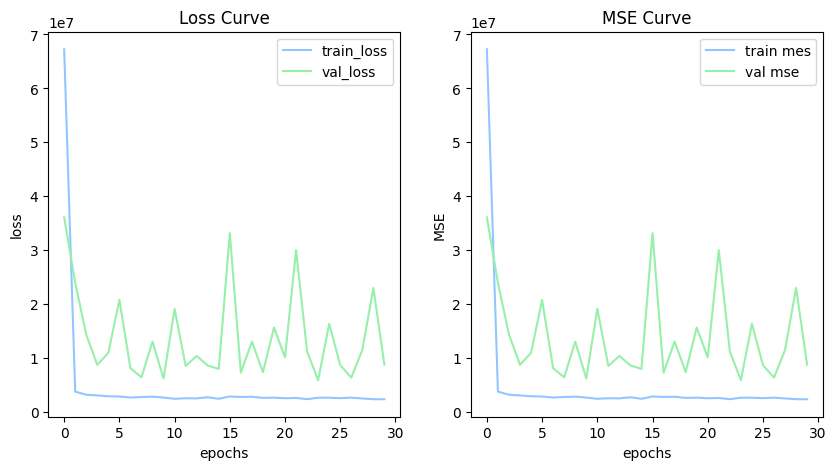

time: 88.8 ms (started: 2024-07-02 11:24:42 +09:00)


In [29]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('Loss Curve')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['mse'], label='train mes')
    plt.plot(hist['epoch'], hist['val_mse'], label='val mse')
    plt.title('MSE Curve')
    plt.legend()
    
    plt.show()

plot_history(history)

## Test 데이터 예측

In [30]:
X_test_s = ms.transform(X_test)
y_test = y_test.to_numpy()

time: 1.13 ms (started: 2024-07-02 11:24:42 +09:00)


In [31]:
X_test_w, y_test_w = make_sequence_dataset(X_test_s, y_test, 20)
X_test_w.shape, y_test_w.shape

((1182, 20, 7), (1182,))

time: 2.45 ms (started: 2024-07-02 11:24:42 +09:00)


In [32]:
y_pred = model.predict(X_test_w)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
time: 180 ms (started: 2024-07-02 11:24:42 +09:00)


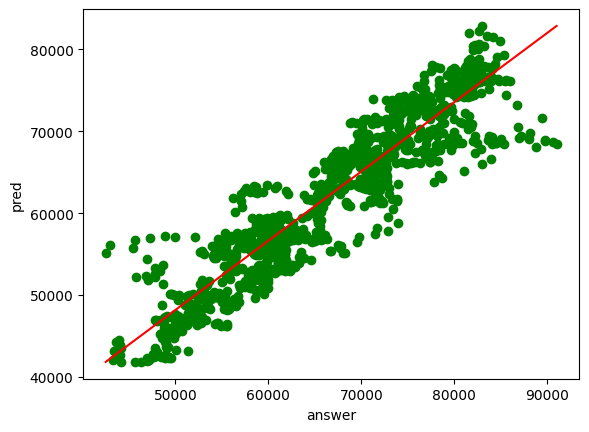

time: 36.8 ms (started: 2024-07-02 11:24:43 +09:00)


In [33]:
plt.scatter(y_test_w,y_pred, color='g')
plt.plot([y_test_w.min(),y_test_w.max()],[y_pred.min(),y_pred.max()], color='r')
plt.xlabel('answer')
plt.ylabel('pred')
plt.show()

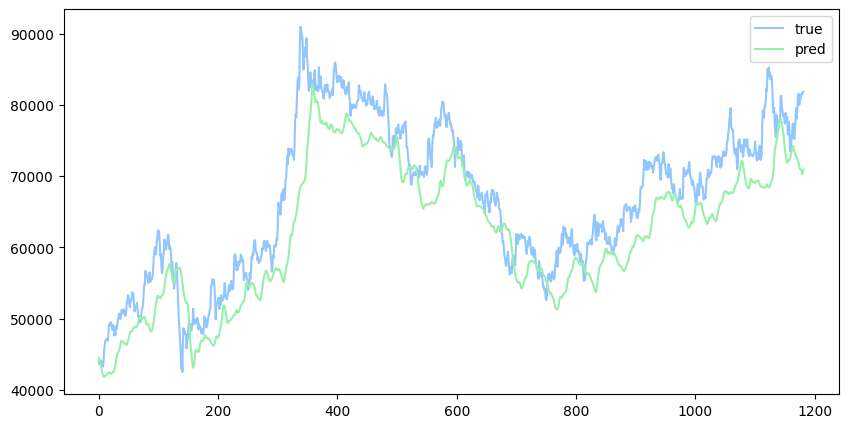

time: 48.4 ms (started: 2024-07-02 11:24:43 +09:00)


In [34]:
plt.figure(figsize=(10,5))
plt.plot(y_test_w, label='true')
plt.plot(y_pred.flatten(), label='pred')
plt.legend()
plt.show()

## 입력이 2개인 모델

In [35]:
# 1번째 입력

input1 = layers.Input(shape=(20,7))
x = layers.LSTM(32, activation='relu')(input1)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
output1 = layers.Dense(8, activation='relu')(x)

time: 36 ms (started: 2024-07-02 11:24:43 +09:00)


In [36]:
# 2번째 입력

input2 = layers.Input(shape=(20,7))
x = layers.LSTM(64, activation='relu')(input2)
x = layers.Dense(16, activation='relu')(x)
output2 = layers.Dense(16, activation='relu')(x)

time: 10.5 ms (started: 2024-07-02 11:24:43 +09:00)


In [37]:
merge_layer = layers.Concatenate()([output1,output2])
output = layers.Dense(1)(merge_layer)

time: 4.25 ms (started: 2024-07-02 11:24:43 +09:00)


In [38]:
model = keras.Model(inputs=[input1,input2], outputs=output)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 20, 7)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │      5,120 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 20, 7)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      1,056 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     18,432 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        528 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │      1,040 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 8)         │        136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 16)        │        272 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 24)        │          0 │ dense_5[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         25 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,609 (103.94 KB)

 Trainable params: 26,609 (103.94 KB)

 Non-trainable params: 0 (0.00 B)

time: 8.36 ms (started: 2024-07-02 11:24:43 +09:00)


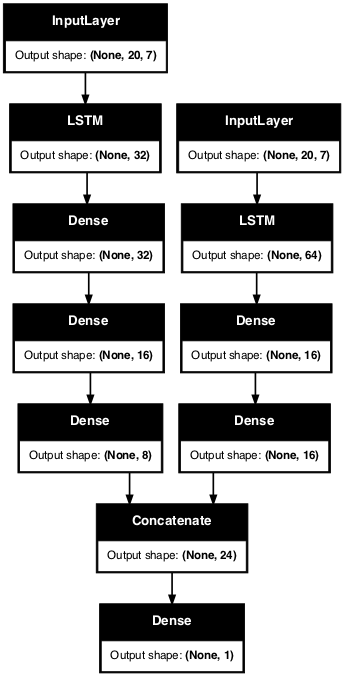

time: 190 ms (started: 2024-07-02 11:27:05 +09:00)


In [45]:
keras.utils.plot_model(model, show_shapes=True, dpi=60)

In [46]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

time: 6.01 ms (started: 2024-07-02 11:27:34 +09:00)


In [47]:
EPOCHS = 30
BATCH_SIZE = 16

history = model.fit([X_train_w,X_train_w], y_train_w, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 152215936.0000 - mse: 152215936.0000 - val_loss: 55259376.0000 - val_mse: 55259376.0000
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1724433.7500 - mse: 1724433.7500 - val_loss: 38605504.0000 - val_mse: 38605504.0000
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1568234.1250 - mse: 1568234.1250 - val_loss: 32125778.0000 - val_mse: 32125778.0000
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1615179.7500 - mse: 1615179.7500 - val_loss: 22938720.0000 - val_mse: 22938720.0000
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1530838.3750 - mse: 1530838.3750 - val_loss: 17589416.0000 - val_mse: 17589416.0000
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1782070.6250 - mse: 1782070.6250 - val_loss: 28301950.0000 - val_mse: 28301950.0000
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1546197.1250 - mse: 1546197.1250 - val_loss: 10390502.0000 - val_mse: 10

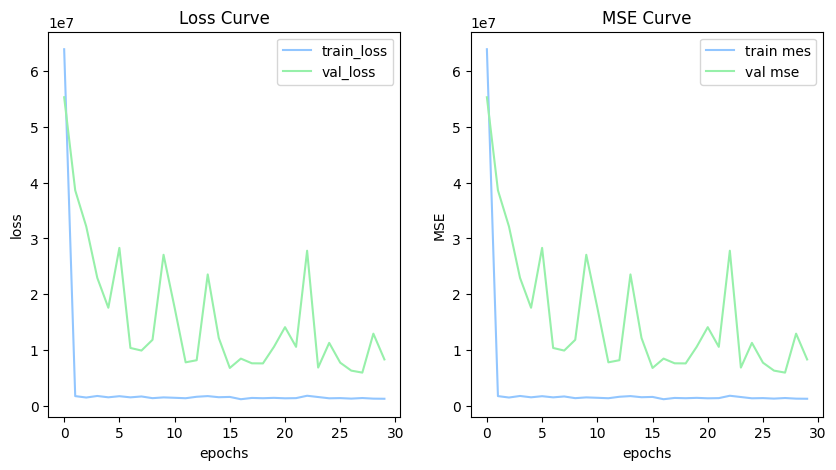

time: 154 ms (started: 2024-07-02 11:30:28 +09:00)


In [48]:
plot_history(history)

In [49]:
y_pred1 = model.predict([X_test_w,X_test_w])

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
time: 316 ms (started: 2024-07-02 11:31:08 +09:00)


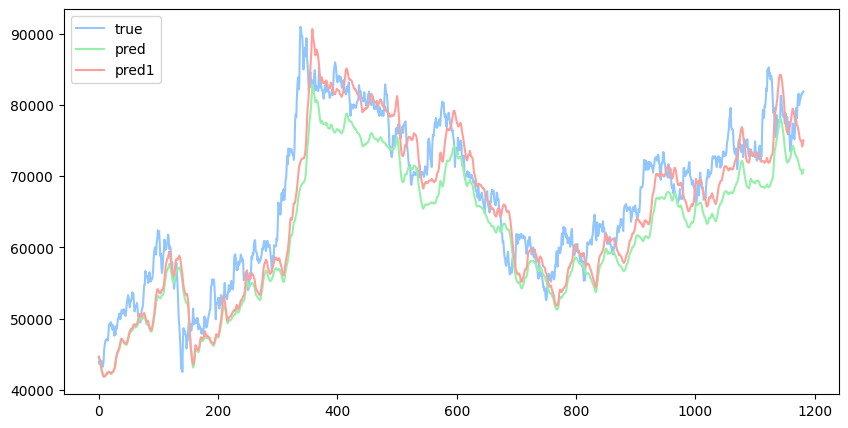

time: 70.5 ms (started: 2024-07-02 11:31:30 +09:00)


In [51]:
plt.figure(figsize=(10,5))
plt.plot(y_test_w, label='true')
plt.plot(y_pred.flatten(), label='pred')
plt.plot(y_pred1.flatten(), label='pred1')
plt.legend()
plt.show()